<a href="https://colab.research.google.com/github/subhdeepkaur/comp215/blob/main/labs/lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the sortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [1]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [2]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
      for city2 in city_map:
          if city1 != city2:
              # this will have duplicate distances (A,B) and (B,A)
              # these duplicates make the algorithm implememntation simpler
              distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


City Map: {'A': (17, 72), 'B': (97, 8), 'C': (32, 15), 'D': (63, 97), 'E': (57, 60), 'F': (83, 48), 'G': (100, 26), 'H': (12, 62), 'I': (3, 49), 'J': (55, 77)}
Distances between cities: {('A', 'B'): 102.4, ('A', 'C'): 58.9, ('A', 'D'): 52.4, ('A', 'E'): 41.8, ('A', 'F'): 70.2, ('A', 'G'): 94.9, ('A', 'H'): 11.2, ('A', 'I'): 26.9, ('A', 'J'): 38.3, ('B', 'A'): 102.4, ('B', 'C'): 65.4, ('B', 'D'): 95.3, ('B', 'E'): 65.6, ('B', 'F'): 42.4, ('B', 'G'): 18.2, ('B', 'H'): 100.7, ('B', 'I'): 102.6, ('B', 'J'): 80.8, ('C', 'A'): 58.9, ('C', 'B'): 65.4, ('C', 'D'): 87.7, ('C', 'E'): 51.5, ('C', 'F'): 60.7, ('C', 'G'): 68.9, ('C', 'H'): 51.1, ('C', 'I'): 44.7, ('C', 'J'): 66.1, ('D', 'A'): 52.4, ('D', 'B'): 95.3, ('D', 'C'): 87.7, ('D', 'E'): 37.5, ('D', 'F'): 52.9, ('D', 'G'): 80.1, ('D', 'H'): 61.9, ('D', 'I'): 76.8, ('D', 'J'): 21.5, ('E', 'A'): 41.8, ('E', 'B'): 65.6, ('E', 'C'): 51.5, ('E', 'D'): 37.5, ('E', 'F'): 28.6, ('E', 'G'): 54.8, ('E', 'H'): 45.0, ('E', 'I'): 55.1, ('E', 'J'): 17.1,

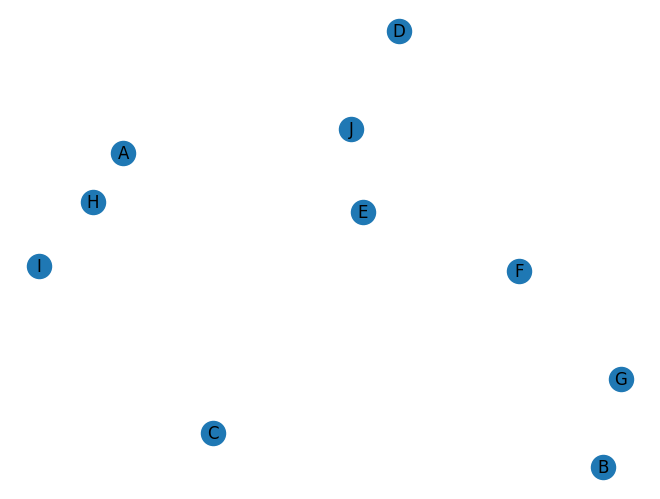

In [3]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [4]:
# Ex. 1 your solution here
def brute_force_tsp(city_map, distances):
    cities = list(city_map.keys())
    start_city = cities[0]  # Always start from the first city (e.g., 'A')
    other_cities = cities[1:]  # The rest of the cities

    min_distance = float('inf')
    best_route = None

    # Generate all possible routes that start and end at start_city
    for perm in itertools.permutations(other_cities):
        route = (start_city,) + perm + (start_city,)  # Complete cycle
        total_distance = sum(distances[(route[i], route[i+1])] for i in range(len(route) - 1))

        # Check if this is the shortest route
        if total_distance < min_distance:
            min_distance = total_distance
            best_route = route

    return best_route, min_distance

# Test the brute force solution
best_route, min_distance = brute_force_tsp(city_map, distances)
print(f"Best route: {best_route} with distance {min_distance}")


Best route: ('A', 'D', 'J', 'E', 'F', 'G', 'B', 'C', 'I', 'H', 'A') with distance 302.7


### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [5]:
# Ex.2 your code here
def nearest_neighbor_tsp(city_map, distances):
    cities = list(city_map.keys())  # List of city names
    start_city = cities[0]  # Always start from 'A' or first city
    unvisited = set(cities)  # Keep track of unvisited cities
    unvisited.remove(start_city)  # Remove starting city from unvisited
    route = [start_city]  # Start the route with the starting city
    total_distance = 0  # Track total distance

    current_city = start_city

    while unvisited:
        # Find the nearest unvisited city
        nearest_city = min(unvisited, key=lambda city: distances[(current_city, city)])
        total_distance += distances[(current_city, nearest_city)]
        route.append(nearest_city)
        unvisited.remove(nearest_city)
        current_city = nearest_city  # Move to the next city

    # Return to the starting city
    total_distance += distances[(current_city, start_city)]
    route.append(start_city)

    return route, total_distance

# Test the nearest neighbor solution
nn_route, nn_distance = nearest_neighbor_tsp(city_map, distances)
print(f"Nearest Neighbor Route: {nn_route} with distance {nn_distance}")


Nearest Neighbor Route: ['A', 'H', 'I', 'C', 'E', 'J', 'D', 'F', 'G', 'B', 'A'] with distance 363.1


### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?



Running TSP with 5 cities...

Brute Force Route: ('A', 'B', 'C', 'D', 'E', 'A') with distance 249.40000000000003


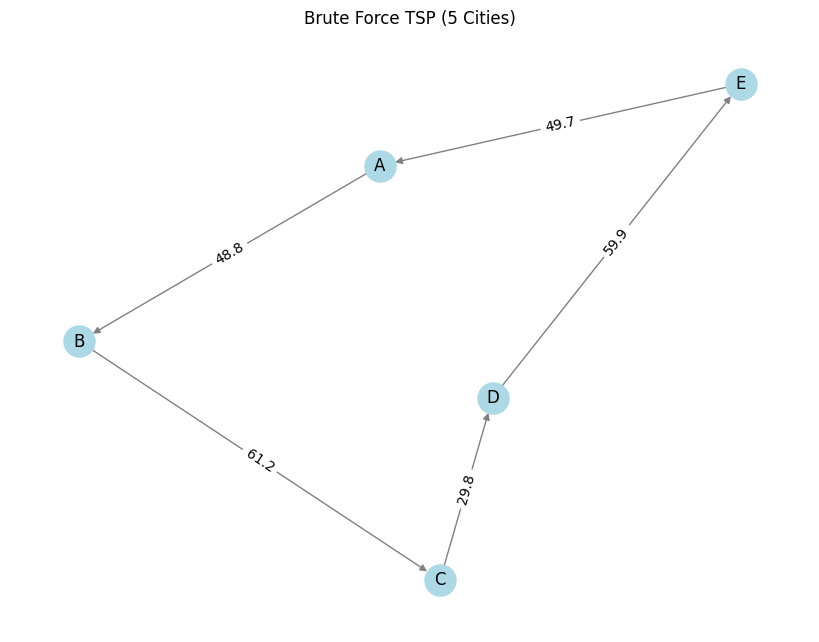

Nearest Neighbor Route: ['A', 'D', 'C', 'B', 'E', 'A'] with distance 277.7


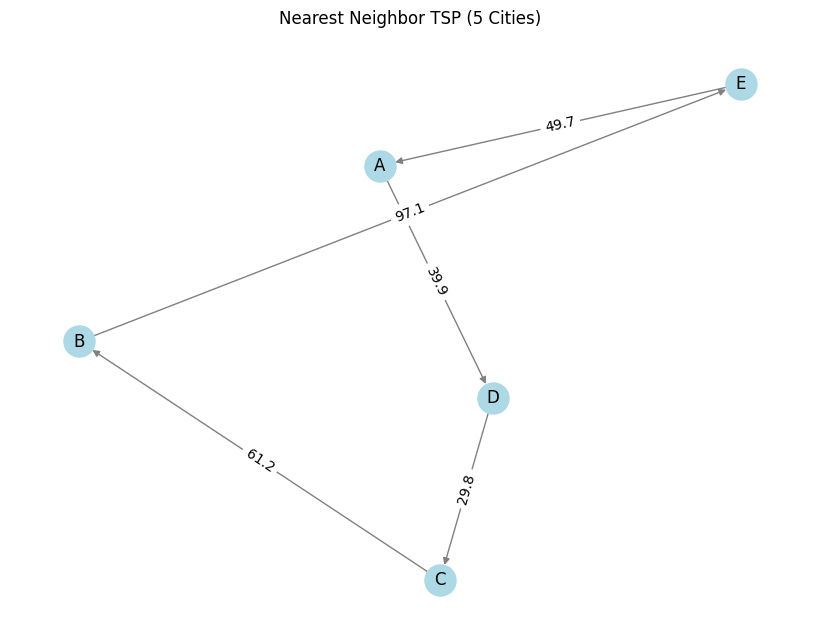

 Different routes found! Brute force is optimal, NN may not be.

Running TSP with 7 cities...

Brute Force Route: ('A', 'C', 'E', 'D', 'G', 'B', 'F', 'A') with distance 240.29999999999998


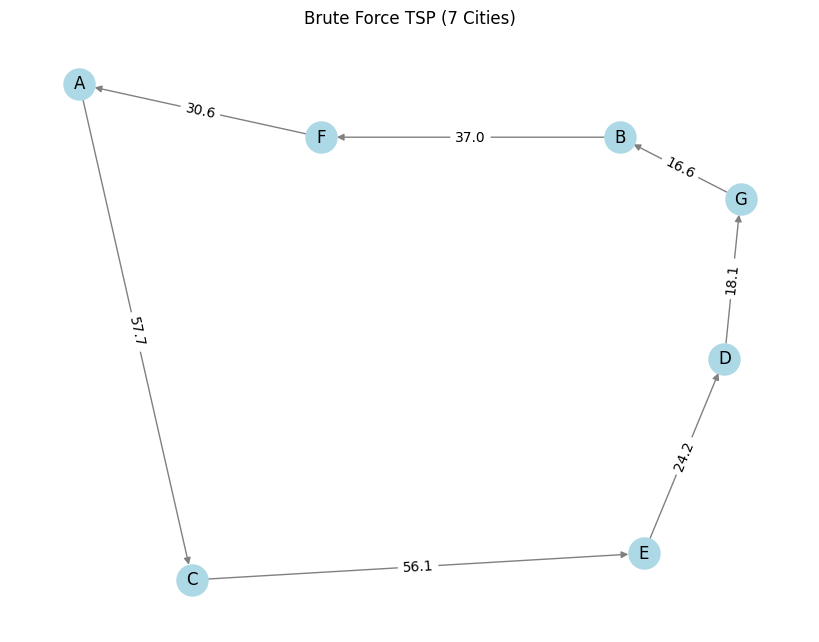

Nearest Neighbor Route: ['A', 'F', 'B', 'G', 'D', 'E', 'C', 'A'] with distance 240.3


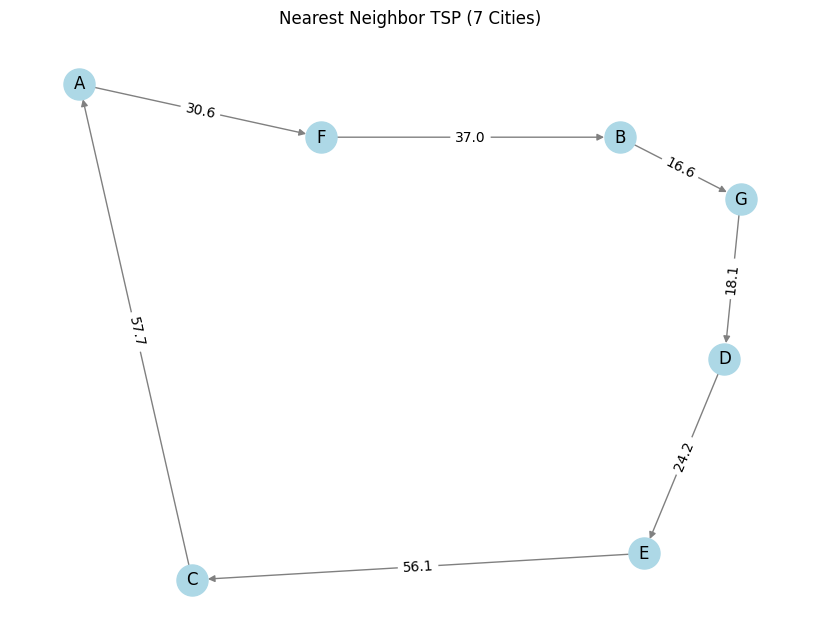

 Different routes found! Brute force is optimal, NN may not be.

Running TSP with 10 cities...

Brute Force Route: ('A', 'H', 'E', 'G', 'D', 'J', 'I', 'C', 'F', 'B', 'A') with distance 244.79999999999998


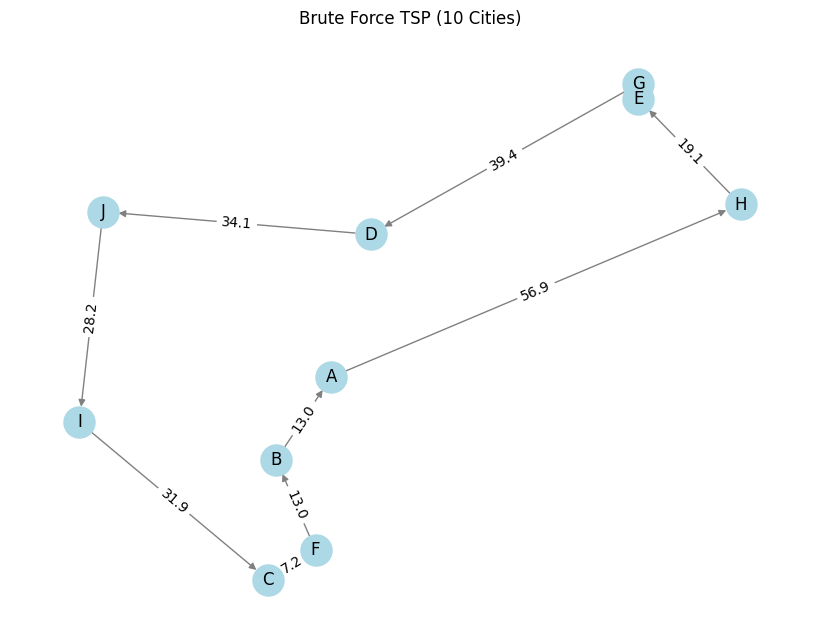

Nearest Neighbor Route: ['A', 'B', 'F', 'C', 'I', 'J', 'D', 'E', 'G', 'H', 'A'] with distance 245.4


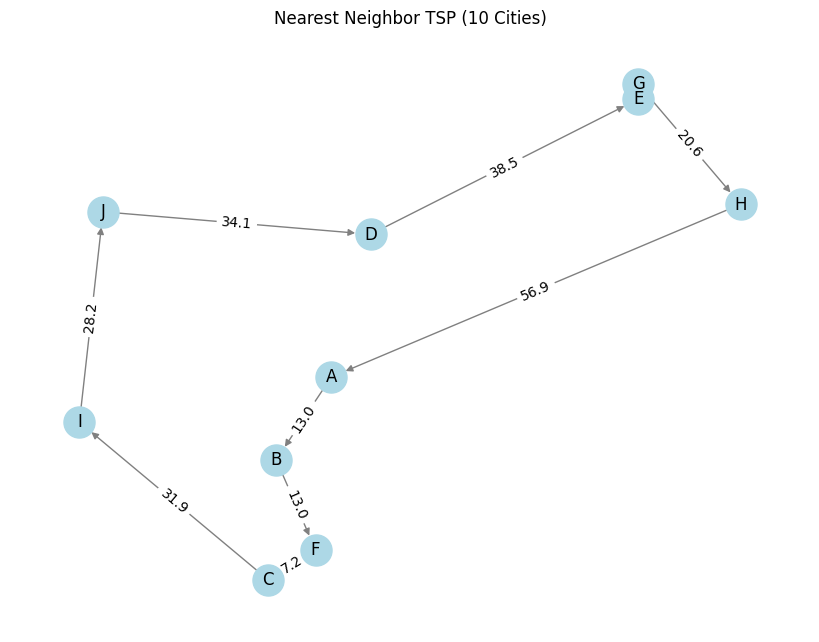

 Different routes found! Brute force is optimal, NN may not be.


In [6]:
# Ex.3 your code here
def plot_tsp_route(city_map, route, distances, title):
    """Plots the TSP route using NetworkX with distances labeled."""
    G = nx.DiGraph()  # Directed graph
    pos = city_map  # Positions of cities

    # Add nodes (cities)
    G.add_nodes_from(city_map.keys())

    # Add directed edges with distances
    edge_labels = {}
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i+1]
        G.add_edge(city1, city2)
        edge_labels[(city1, city2)] = distances[(city1, city2)]

    # Draw graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title(title)
    plt.show()

# Run multiple tests with different sizes
for size in [5, 7, 10]:
    print(f"\nRunning TSP with {size} cities...\n")
    city_map = setup_map(size, seed=random.randint(1, 100))  # Different setups
    distances = calculate_distances(city_map)

    # Brute force solution
    bf_route, bf_distance = brute_force_tsp(city_map, distances)
    print(f"Brute Force Route: {bf_route} with distance {bf_distance}")
    plot_tsp_route(city_map, bf_route, distances, f"Brute Force TSP ({size} Cities)")

    # Nearest Neighbor solution
    nn_route, nn_distance = nearest_neighbor_tsp(city_map, distances)
    print(f"Nearest Neighbor Route: {nn_route} with distance {nn_distance}")
    plot_tsp_route(city_map, nn_route, distances, f"Nearest Neighbor TSP ({size} Cities)")

    # Compare solutions
    if bf_route == nn_route:
        print("✅ Both algorithms found the same route!")
    else:
        print(" Different routes found! Brute force is optimal, NN may not be.")


### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  


Running TSP with 2 cities...
Brute Force TSP time: 0.00001 seconds
Nearest Neighbor TSP time: 0.00001 seconds

Running TSP with 3 cities...
Brute Force TSP time: 0.00001 seconds
Nearest Neighbor TSP time: 0.00001 seconds

Running TSP with 4 cities...
Brute Force TSP time: 0.00002 seconds
Nearest Neighbor TSP time: 0.00001 seconds

Running TSP with 5 cities...
Brute Force TSP time: 0.00004 seconds
Nearest Neighbor TSP time: 0.00001 seconds

Running TSP with 6 cities...
Brute Force TSP time: 0.00022 seconds
Nearest Neighbor TSP time: 0.00001 seconds

Running TSP with 7 cities...
Brute Force TSP time: 0.00149 seconds
Nearest Neighbor TSP time: 0.00002 seconds

Running TSP with 8 cities...
Brute Force TSP time: 0.00959 seconds
Nearest Neighbor TSP time: 0.00002 seconds

Running TSP with 9 cities...
Nearest Neighbor TSP time: 0.00002 seconds

Running TSP with 10 cities...
Nearest Neighbor TSP time: 0.00004 seconds


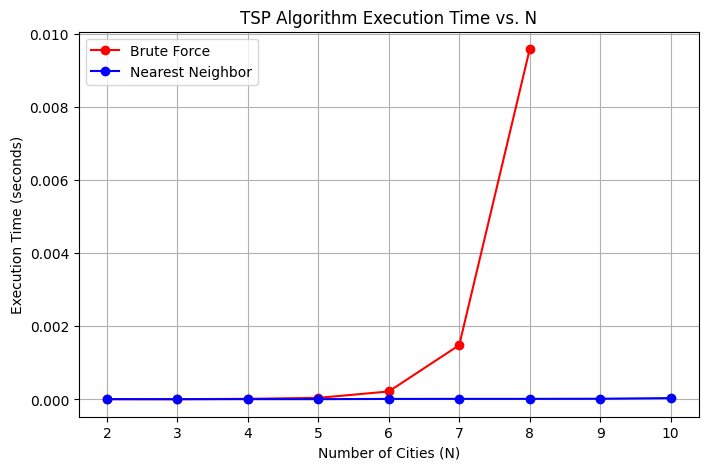

In [7]:
# Ex 4: your code here
def measure_time(func, city_map, distances, trials=5):
    """Measures the average execution time of a function over multiple trials."""
    times = []
    for _ in range(trials):
        start = time.time()
        func(city_map, distances)  # Run the algorithm
        end = time.time()
        times.append(end - start)
    return sum(times) / len(times)  # Return average time

# Test different values of N (number of cities)
city_sizes = list(range(2, 11))  # N = 2 to 10
brute_force_times = []
nn_times = []

for N in city_sizes:
    city_map = setup_map(N, seed=42)  # Fixed seed for consistency
    distances = calculate_distances(city_map)

    print(f"\nRunning TSP with {N} cities...")

    # Measure brute force execution time
    if N <= 8:  # Brute force is too slow for N > 8
        bf_time = measure_time(brute_force_tsp, city_map, distances)
        brute_force_times.append(bf_time)
        print(f"Brute Force TSP time: {bf_time:.5f} seconds")
    else:
        brute_force_times.append(None)  # Skip large N

    # Measure nearest neighbor execution time
    nn_time = measure_time(nearest_neighbor_tsp, city_map, distances)
    nn_times.append(nn_time)
    print(f"Nearest Neighbor TSP time: {nn_time:.5f} seconds")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(city_sizes[:len(brute_force_times)], brute_force_times, 'ro-', label="Brute Force")
plt.plot(city_sizes, nn_times, 'bo-', label="Nearest Neighbor")
plt.xlabel("Number of Cities (N)")
plt.ylabel("Execution Time (seconds)")
plt.title("TSP Algorithm Execution Time vs. N")
plt.legend()
plt.grid()
plt.show()
